In [18]:
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import os

Huffman algorithm implementation
Першопочатково реалізується клас вершини(Node)
Він використовується для утворення дерева, у якому внутрішні вершини це сума частоти трапляння вершин-синів, а листки це символи.

Клас Huffman_Code(Не CamelCase xd) виконує безпосередню роботу алгоритму.

def calculate_probabities()
Ця функція створює список всіх унікальних символів у повідомленні та сортує відповідно до зменшення частоти трапляння символу (ex.[0.б, 0.3, 0.1])

def create_tree(self):
Ця функція запускає цикл while, доки у списку всіх вершин не залишиться лише одна вершина(корінь) та викликає creation()
Як аргументи вона передає дві вершини, що трапляються найрідше

def creation()
Функція приймає два аргументи(дві вершини, що трапляються найрідше)
Створює для них одного батька, видаляє найрідші вершини зі списку всіх вершин та додає новоутворену

def get_codes()
Функція проходиться по утвореному дереву рекурсивно кожного разу оновлюючи код за допомогою 0 чи 1 допоки не потрапить в листок, тоді присвоює листку утворений код.

def calculate_encode()
Викликає вищеперчислені функції щоб отримати закодоване повідомлення.

def huffman_decode()
Функція проходиться по закодованому повідомленню та сприймає його як путівник для дерева.
Якщо 0 - прямує в лівого сина, якщо 1 - у правого. Допоки не дійде в листок. Тоді отримує закодований символ.

def get_leaves()
Рекурсивно проходиться по дереву та отримує символи та відповідне кодування для них.

Найоптимальніше алгоритм працює для повідомлень з великою кількістю повторів символів.

In [19]:
class Node:
    def __init__(self, value=None, symbol=None, is_leaf=False, lc=None, rc = None):
        self.value = value # frequency
        self.symbol = symbol
        self.left_children = lc
        self.right_children = rc
        self.is_leaf = is_leaf # True if node is leaf - is symbol
        self.code = None

class Huffman_code:
    def __init__(self):
        self.root = None

    def calculate_probabities(self, sequence):
        for symbola in set(sequence):
            self.stats.append(Node(value = sequence.count(symbola), symbol=symbola, is_leaf=True))
        self.stats = sorted(self.stats, key=lambda x: x.value, reverse=True)

    def create_tree(self):
        while len(self.stats) != 1:
            self.creation(self.stats[-1], self.stats[-2])

    def creation(self, node_right, node_left):
        if len(self.stats) != 2:
            self.stats = self.stats[:-2]
            self.stats.append(Node(value = node_left.value + node_right.value, rc = node_right, lc = node_left))
            self.stats = sorted(self.stats, key=lambda x: x.value, reverse=True)
        else:
            self.root = Node(value = node_left.value + node_right.value, rc = node_right, lc = node_left)
            self.stats = [Node(value = node_left.value + node_right.value, rc = node_right, lc = node_left)]

    def get_codes(self, root, code=''):
        try:
            if root.is_leaf:
                root.code = code
                self.codes[root.symbol] = root.code
            self.get_codes(root.left_children, code=code + '0')
            self.get_codes(root.right_children, code=code + '1')

        except AttributeError:
            None

    def calculate_encode(self, sequence):
        self.codes = {}
        self.stats = []
        self.root = None
        result = ''
        self.calculate_probabities(sequence)
        self.create_tree()
        self.get_codes(self.root)
        for element in sequence:
            result = result + self.codes[element]
        return result, self.root

    def huffman_decode(self, code, tree):
        current_node = tree
        decoded_string = ""

        for bit in code:
            if bit == "0":
                current_node = current_node.left_children
            else:
                current_node = current_node.right_children

            if current_node.is_leaf:
                decoded_string += current_node.symbol
                current_node = tree

        return decoded_string

    def get_leaves(self, node, lst):
        if node is None:
            return
        if node.is_leaf:
            lst.append(node)
            return
        self.get_leaves(node.left_children, lst)
        self.get_leaves(node.right_children, lst)
        return {leaf.code: leaf.symbol for leaf in lst}

LZ77.

Створюємо обʼєкт LZ77 в якому будуть 2 основних методи compress i decompress, які відповідають за кодування і розкодування даних.
Кодування:
В метод compress() вноситься якісь дані, що потрібно закодувати. Потім ми запускаємо цикл, який буде працювати доки прочитаний елемент(read) не перевищить довжину початкових даних. Доки цикл працює він буде викликати інший метод, що знаходить найкращі елементи для закодування і буде додавати це все до codes у вигляді кортежів з трьох елементів.

Розкодування:
Метод decompress() проходиться по коді, який нам дали і якщо offset дорівнює 0, то він записує в повідомлення next. в іншому випадку він буде проходитись циклом по параметру length і додавати до повідомлення його ж частину, а в кінці додасть next.

Найкраще цей алгоритм працює для тексту з абсолютно однакових послідовностей, і ефективність його стиску залежить від довжини буфера. Чим вона більша - тим стиск ефективніший.


In [20]:
class LZ77:
    def __init__(self, buffer_length = 10):
        self.buffer_length = buffer_length

    def compress(self, text):
        read = 0
        length_data = len(text)
        buffer = ''
        code = []
        while read < length_data:
            offset, length, next, buffer, read = self.best_matches_compress(text, buffer, read)
            code.append((offset, length, next))
        return code

    def decompress(self, code):

        message = ''
        for index, length, next in code:
            if not index:
                message += next
            else:
                start = len(message) - index
                for i in range(length):
                    message += message[start + i]
                message += next
        return message

    def best_matches_compress (self, data, buffer, position):
        offset = 0
        length = 0
        buf_len = len(buffer)
        index = 0
        message = ''
        next = data[position]
        try:
            while True:
                message += next
                if index + length > buf_len:
                    if repetition:
                        if repetition[length % len_rep] == data[position]:
                            length += 1
                            position += 1
                            next = data[position]
                        else:
                            break
                    else:
                        break
                else:
                    if message in buffer:
                        index = buffer.index(message)
                        offset = buf_len - index
                        length += 1
                        position += 1
                        next = data[position]
                        repetition = buffer[index:]
                        len_rep = len(repetition)
                    else:
                        break
        except IndexError:
            next = ''
        return (offset, length, next, (buffer + message)[-self.buffer_length:], position + 1)


LZW

Все відбувається у класі Lzw

def encode()

Приймає повідомлення, що потрібно закодувати
Утворює словник з унікальними символами та їх кодуванням.
Алгоритм працює наступним чином: для заощадження пам'яті та кращої роботи алгоритм використовує слайсинг з постійною зміною індексів.
Символами тут є 2 елементи повідомлення(послідовність[стартовий індекс: кінцевий індекс]).
Якщо перевірених символів немає у словнику символів та кодів, то їх туди додають. Якщо вони там є, то до символів додається ще один символ, та перевіряється крок 1.
Опісля збільшується стартовий індекс та ендовий індекс для вибору символів. У кінці додається останній символ(символи), що не потрапили до словника через збільшення стартового індексу.

def decode

Алгоритм працює з сирим словником(словником з унікальними символами). Проходиться по коду та перевіряє чи є код у словнику, якщо так, то додає його у розкодоване повідомлення
та змінює останній код(previous) на це значення. Якщо ні, то об'єднує останній код з першим символом останнього коду та додає його у словник, розкодоване повідомлення. Присвоює останньому коду отримане значення.

Алгоритм є найоптимальнішим для повідомлень що містять велику кількість повторюваних символів. LZW має кращу ефективність стиснення даних, ніж алгоритм Гаффмана, оскільки LZW може ефективно кодувати повторювані фрагменти даних, не потребуючи додаткового місця для збереження цих фрагментів у словнику.

In [21]:
class Lzw:

    def encode(self, sequence):
        self.dict_encodes = dict()
        self.dict_rough_encodes = dict()
        self.codes = list()
        code_number = 0
        start = 0
        end = 2
        for symbol in sorted(list(set(sequence))):
            self.dict_encodes[symbol] = code_number
            self.dct = {}
            self.dict_rough_encodes[code_number] = symbol
            code_number += 1

        while len(sequence) > end:
            symbols = sequence[start:end]
            cropper = 2
            if symbols not in self.dict_encodes.keys():
                self.dict_encodes[symbols] = code_number
                self.dct[code_number] = symbols
                self.codes.append(self.dict_encodes[symbols[:-1]])
                start += len(symbols) - 1
                end += 1
                code_number += 1

            else:
                try:
                    while symbols in self.dict_encodes and symbols != sequence[start: end+1]:
                        end += 1
                        cropper += 1
                        symbols = sequence[start: end]
                except IndexError:
                    pass
                self.codes.append(self.dict_encodes[symbols[:-1]])
                self.dict_encodes[symbols] = code_number
                self.dct[code_number] = symbols
                start = end - 1
                end += 1
                code_number += 1

        info = sequence[start:]
        if len(info) > 1 and info != '':
            self.codes.append(self.dict_encodes[info[:-1]])
            self.codes.append(self.dict_encodes[info[-1]])
        elif len(info) == 1:
            self.codes.append(self.dict_encodes[info])
        return self.codes, self.dict_rough_encodes

    def decode(self, codes, start_dict):
        result = []
        lenght = len(start_dict)
        previous = start_dict[codes.pop(0)]
        result.append(previous)
        for code in codes:
            if code in start_dict:
                to_add = start_dict[code]
                start_dict[lenght] = previous + to_add[0]
                lenght += 1
                result.append(to_add)
                previous = to_add
            else:
                to_add = previous + previous[0]
                start_dict[lenght] = to_add
                lenght += 1
                result.append(to_add)
                previous = to_add
        return ''.join(result)

Deflate

Алгоритм поєднує у собі lz77 та lzw.

def encode()

Кодує використовуючи кодування lz77 та lzw.

def decode()

Розкодовує, початково закидуючи закодоване повідомлення в розкодування Гаффмана, а пізніше в розкодування lz77

Ефективність алгоритму залежить від кількості повторюваних символів. Чим їх більше - тим оптимальніший алгоритм.

Нижче буде наведено порівняння стиснення цих алгоритмів та їх аналіз

In [22]:
class Deflate(LZ77, Huffman_code):
    def __init__(self, buffer_length):
        LZ77.__init__(self, buffer_length)
        Huffman_code.__init__(self)

    def huffman_decode(self, code, tree):
        current_node = tree
        decoded_result = []

        for bit in code:
            if bit == "0":
                current_node = current_node.left_children
            else:
                current_node = current_node.right_children

            if current_node.is_leaf:
                decoded_result.append(current_node.symbol)
                current_node = tree

        return decoded_result


    def deflate_encode(self, data):
        self.stats = []
        self.codes = {}
        test = self.compress(data)
        to_analyse = []

        for off, lenth, next in test:
            to_analyse.append(off)
            to_analyse.append(lenth)
            to_analyse.append(next)

        return self.calculate_encode(to_analyse)

    def deflate_decode(self, data, node):
        test = self.huffman_decode(data, node)
        i = 0
        to_analyse = []
        length = len(test)
        while i < length:
            to_analyse.append((test[i], test[i+1], test[i+2]))
            i += 3
        return self.decompress(to_analyse)


Checking of correct working on novel "ChornaRada"
Length of buffer for LZ77 and Deflate - 100

In [23]:
with open('test_documents/35kb_orwell_1984.txt', encoding='utf-8') as file: #It's txt file of Hunter games
    data = file.read()

lzw = Lzw()
compresed_lzw = lzw.encode(data)
decode_lzw = lzw.decode(*compresed_lzw)
print(f"LZW : Data and decompressed data is equal - {data == decode_lzw}")

lz77 = LZ77(100)
compresed_lz77 = lz77.compress(data)
decode_lz77 = lz77.decompress(compresed_lz77)
print(f"LZ77: Data and decompressed data is equal - {data == decode_lz77}")

hufman = Huffman_code()
compress_huffman = hufman.calculate_encode(data)
decode_huffman = hufman.huffman_decode(*compress_huffman)
print(f"Huffman: Data and decompressed data is equal - {data == decode_huffman}")

deflate = Deflate(100)
compress_deflate = deflate.deflate_encode(data)
decode_deflate = deflate.deflate_decode(*compress_deflate)
print(f"Deflate: Data and decompressed data is equal - {data == decode_deflate}")

LZW : Data and decompressed data is equal - True
LZ77: Data and decompressed data is equal - True
Huffman: Data and decompressed data is equal - True
Deflate: Data and decompressed data is equal - True


LZ77 comperasion runtime of defferent buffer size

In [24]:
def comparison_lz77(len_buf, data):
    NUM_OF_ITERATIONS = 10
    time_taken = 0
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        # note that we should not measure time of graph creation
        my_lz77 = LZ77(len_buf)

        start = time.time()
        my_lz77.compress(data)
        end = time.time()

        time_taken += end - start

    return time_taken/NUM_OF_ITERATIONS


100%|██████████| 10/10 [00:00<00:00, 25.09it/s]


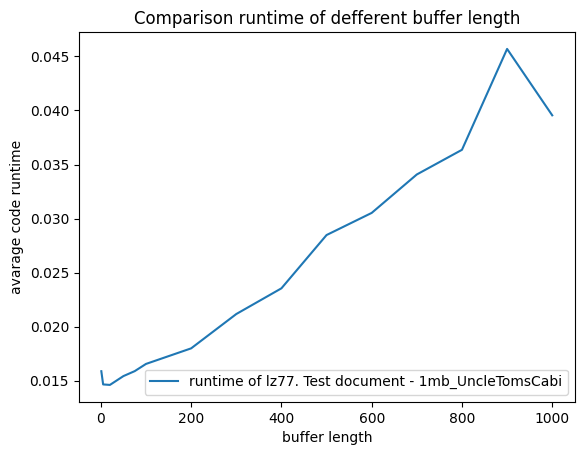

In [25]:
buffers_length = [1, 5, 20, 50, 75, 100, 200, 300, 400,  500, 600, 700, 800, 900, 1000]
own_times = []
with open('test_documents/35kb_orwell_1984.txt', encoding='utf-8') as file:
  data = file.read()
for buf_length in buffers_length:
  own_time = comparison_lz77(buf_length, data)
  own_times.append(own_time)

plt.plot(buffers_length, own_times, label ='runtime of lz77. Test document - 1mb_UncleTomsCabi')
plt.xlabel('buffer length')
plt.ylabel('avarage code runtime')
plt.title("Comparison runtime of defferent buffer length")
plt.legend()

In [26]:
def Encode_algo(data):
  NUM_OF_ITERATIONS = 10

  time_lz77 = 0
  time_lzw = 0
  time_huffman = 0
  time_deflate = 0
  for i in tqdm(range(NUM_OF_ITERATIONS)):
      
      # note that we should not measure time of graph creation
      lz77 = LZ77(100)
      lzw = Lzw()
      deflate = Deflate(100)
      huffman = Huffman_code()

      start_lz77 = time.time()
      lz77_encode = lz77.compress(data)
      end_lz77 = time.time()

      start_lzw = time.time()
      lzw_encode = lzw.encode(data)
      end_lzw = time.time()

      start_huffman = time.time()
      huffman_encode = huffman.calculate_encode(data)
      end_huffman = time.time()

      start_deflate = time.time()
      deflate_encode = deflate.deflate_encode(data)
      end_deflate = time.time()




      time_lz77 += end_lz77 - start_lz77
      time_lzw += end_lzw - start_lzw
      time_huffman += end_huffman - start_huffman
      time_deflate += end_deflate - start_deflate

      
  return(time_lz77/NUM_OF_ITERATIONS, time_lzw/NUM_OF_ITERATIONS, time_huffman/NUM_OF_ITERATIONS, time_deflate/NUM_OF_ITERATIONS)

In [27]:
def Decode_algo(data):
  NUM_OF_ITERATIONS = 10

  time_lz77 = 0
  time_lzw = 0
  time_huffman = 0
  time_deflate = 0
  for i in tqdm(range(NUM_OF_ITERATIONS)):
      
      # note that we should not measure time of graph creation
      lz77 = LZ77(100)
      lzw = Lzw()
      deflate = Deflate(100)
      huffman = Huffman_code()

      lz77_encode = lz77.compress(data)
      start_lz77 = time.time()
      lz77_decode = lz77.decompress(lz77_encode)
      end_lz77 = time.time()

      lzw_encode = lzw.encode(data)
      start_lzw = time.time()
      lzw_decode = lzw.decode(*lzw_encode)
      end_lzw = time.time()
      
      huffman_encode = huffman.calculate_encode(data)
      start_huffman = time.time()
      huffman_decode = huffman.huffman_decode(*huffman_encode)
      end_huffman = time.time()
      
      deflate_encode = deflate.deflate_encode(data)
      start_deflate = time.time()
      deflate_decode = deflate.deflate_decode(*deflate_encode)
      end_deflate = time.time()




      time_lz77 += end_lz77 - start_lz77
      time_lzw += end_lzw - start_lzw
      time_huffman += end_huffman - start_huffman
      time_deflate += end_deflate - start_deflate

      
  return(time_lz77/NUM_OF_ITERATIONS, time_lzw/NUM_OF_ITERATIONS, time_huffman/NUM_OF_ITERATIONS, time_deflate/NUM_OF_ITERATIONS)

In [28]:
def runtime_algo(data):
  NUM_OF_ITERATIONS = 10

  time_lz77 = 0
  time_lzw = 0
  time_huffman = 0
  time_deflate = 0
  for i in tqdm(range(NUM_OF_ITERATIONS)):
      
      # note that we should not measure time of graph creation
      lz77 = LZ77(100)
      lzw = Lzw()
      deflate = Deflate(100)
      huffman = Huffman_code()

      start_lz77 = time.time()
      lz77_encode = lz77.compress(data)
      lz77_decode = lz77.decompress(lz77_encode)
      end_lz77 = time.time()

      start_lzw = time.time()
      lzw_encode = lzw.encode(data)
      lzw_decode = lzw.decode(*lzw_encode)
      end_lzw = time.time()
      
      start_huffman = time.time()
      huffman_encode = huffman.calculate_encode(data)
      huffman_decode = huffman.huffman_decode(*huffman_encode)
      end_huffman = time.time()
      
      start_deflate = time.time()
      deflate_encode = deflate.deflate_encode(data)
      deflate_decode = deflate.deflate_decode(*deflate_encode)
      end_deflate = time.time()




      time_lz77 += end_lz77 - start_lz77
      time_lzw += end_lzw - start_lzw
      time_huffman += end_huffman - start_huffman
      time_deflate += end_deflate - start_deflate

      
  return(time_lz77/NUM_OF_ITERATIONS, time_lzw/NUM_OF_ITERATIONS, time_huffman/NUM_OF_ITERATIONS, time_deflate/NUM_OF_ITERATIONS)

100%|██████████| 10/10 [00:00<00:00, 10034.22it/s]


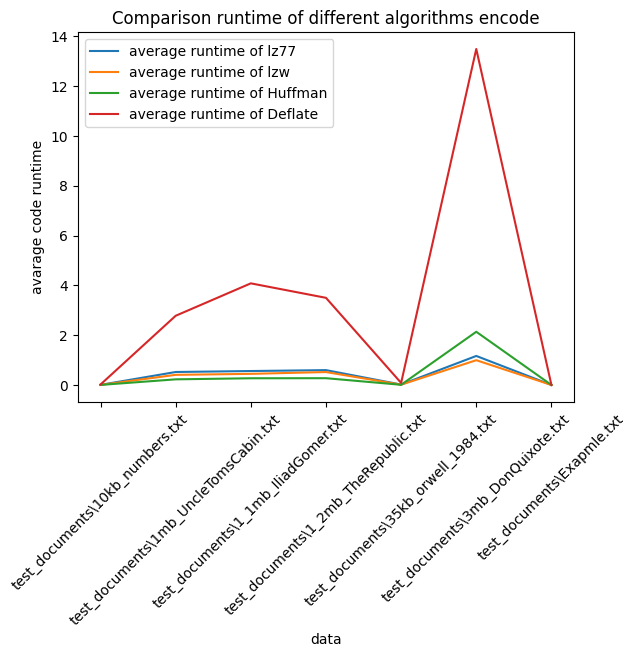

In [29]:
datas = os.listdir('test_documents')
datas = [os.path.join('test_documents', data) for data in datas if '.txt' in data]
times_lz77 = []
times_lzw = []
times_huffman = []
times_deflate = []
for data in datas:
    if '.txt' not in data:
        continue
    with open(data, encoding='utf-8', errors='ignore') as file:
        data = file.read()
    time_lz77, time_lzw, time_huffman, time_deflate = Encode_algo(data)
    times_lz77.append(time_lz77)
    times_lzw.append(time_lzw)
    times_huffman.append(time_huffman)
    times_deflate.append(time_deflate)

plt.plot(datas, times_lz77, label ='average runtime of lz77')
plt.plot(datas, times_lzw, label ='average runtime of lzw')
plt.plot(datas, times_huffman, label ='average runtime of Huffman')
plt.plot(datas, times_deflate, label ='average runtime of Deflate')
plt.xticks(rotation=45)

plt.xlabel('data')
plt.ylabel('avarage code runtime')
plt.title("Comparison runtime of different algorithms encode")
plt.legend()

Here you can see code to compare default weigth of files and weight of encoded files.

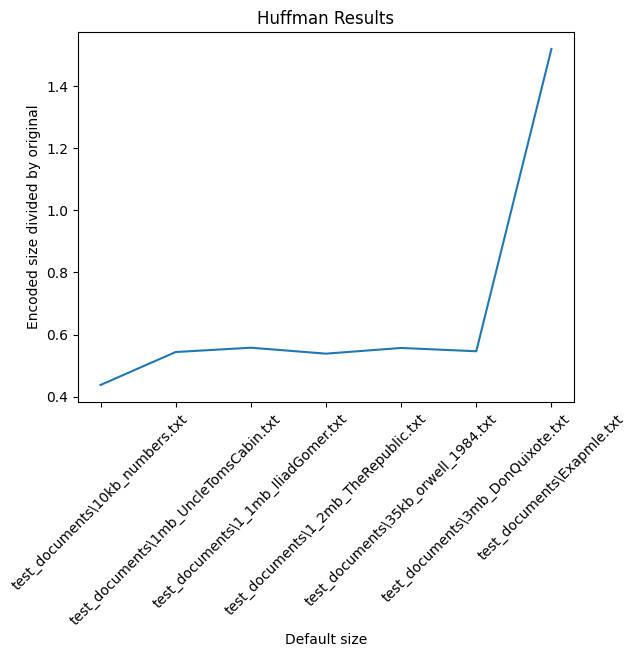

In [30]:
datas = os.listdir('test_documents')
file_names = [os.path.join('test_documents', data) for data in datas if '.txt' in data]

delta_sizes_huffman = list()
for name in file_names:
    with open(name, encoding='utf-8', errors='ignore') as file:
        data = file.read()

    huffman = Huffman_code()
    compressed_huffman = huffman.calculate_encode(data)[0]
    # print(name, len(compressed_huffman), os.path.getsize(name))
    weight_encoded = len(compressed_huffman)/8 + sum([len(element)/8 for element in huffman.get_leaves(huffman.root, []).keys()]) + sum([1 for element in huffman.get_leaves(huffman.root, []).values()])


    delta_sizes_huffman.append(weight_encoded/(os.path.getsize(name)))

plt.plot(file_names, delta_sizes_huffman)
plt.xlabel('Default size')
plt.ylabel('Encoded size divided by original')
plt.title('Huffman Results')
plt.xticks(rotation=45)

# Displaying the plot
plt.show()


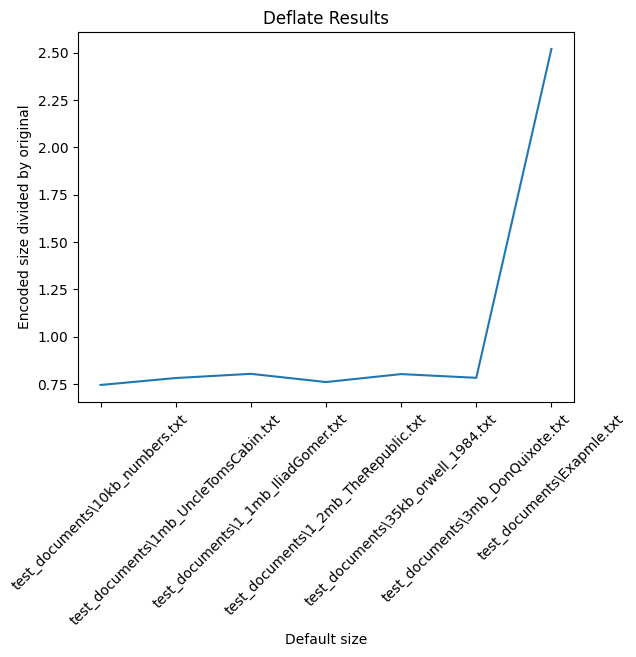

In [31]:
datas = os.listdir('test_documents')
file_names = [os.path.join('test_documents', data) for data in datas if '.txt' in data]

delta_sizes_deflate = list()
for name in file_names:
    with open(name, encoding='utf-8', errors='ignore') as file:
        data = file.read()

    deflate = Deflate(150)
    compressed_deflate, node = deflate.deflate_encode(data)
    weight_encoded = len(compressed_deflate)/8 + sum([len(element)/8 for element in deflate.get_leaves(node, []).keys()]) + sum([1 for element in deflate.get_leaves(node, []).values()])


    delta_sizes_deflate.append(weight_encoded/os.path.getsize(name))

plt.plot(file_names, delta_sizes_deflate)
plt.xlabel('Default size')
plt.ylabel('Encoded size divided by original')
plt.title('Deflate Results')
plt.xticks(rotation=45)

# Displaying the plot
plt.show()


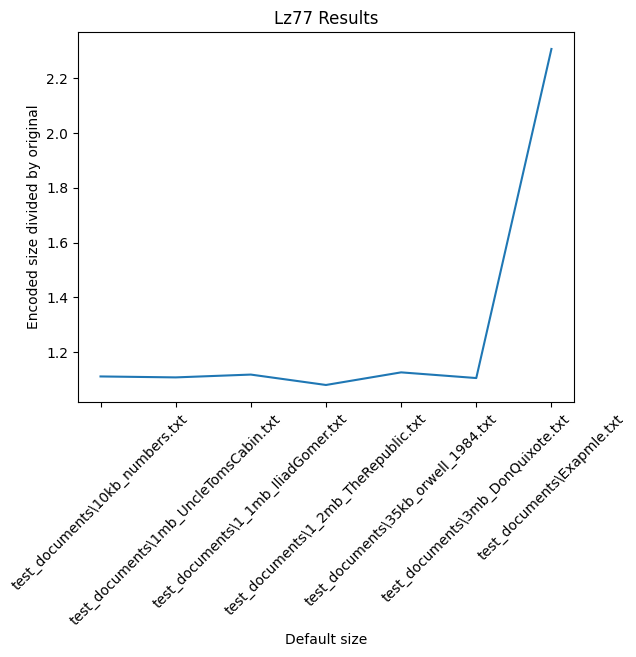

In [32]:
datas = os.listdir('test_documents')
file_names = [os.path.join('test_documents', data) for data in datas if '.txt' in data]

delta_sizes_lz77 = list()
for name in file_names:
    with open(name, encoding='utf-8', errors='ignore') as file:
        data = file.read()

    lz77_encode = lz77.compress(data)

    weight_encoded = (len(lz77_encode))*3


    delta_sizes_lz77.append(weight_encoded/os.path.getsize(name))

plt.plot(file_names, delta_sizes_lz77)
plt.xlabel('Default size')
plt.ylabel('Encoded size divided by original')
plt.title('Lz77 Results')
plt.xticks(rotation=45)

# Displaying the plot
plt.show()



3741 11
196047 92
215093 183
210436 115
10629 68
385651 107
13 10


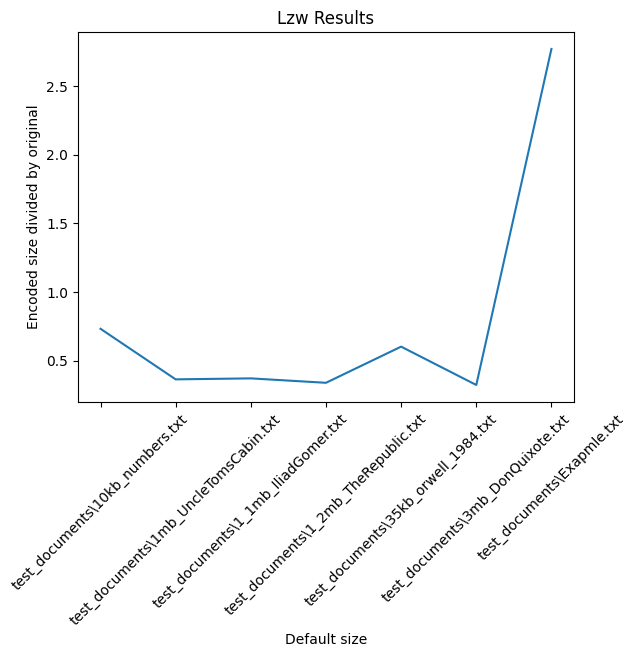

In [33]:
datas = os.listdir('test_documents')
file_names = [os.path.join('test_documents', data) for data in datas if '.txt' in data]

delta_sizes_lzw = list()
lzw = Lzw()
for name in file_names:
    with open(name, encoding='utf-8', errors='ignore') as file:
        data = file.read()


    lzw_encode, dct = lzw.encode(data)

    # weight_encoded = (len(lz77_encode))*3)
    weight_encoded = len(lzw_encode) * 2 + len(dct)
    print(len(lzw_encode), len(dct))
    # print(weight_encoded, os.path.getsize('test_files\\' + name))
    delta_sizes_lzw.append(weight_encoded/os.path.getsize(name))


plt.plot(file_names, delta_sizes_lzw)
plt.xlabel('Default size')
plt.ylabel('Encoded size divided by original')
plt.title('Lzw Results')
plt.xticks(rotation=45)

# Displaying the plot
plt.show()


Total comparison

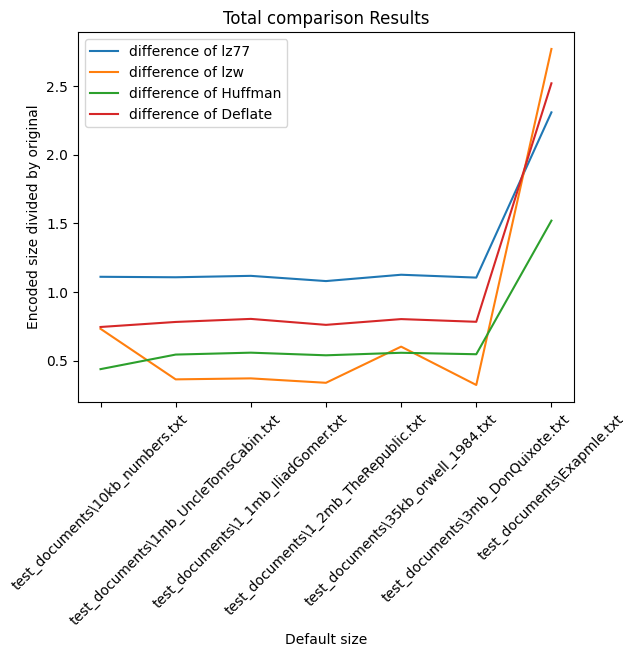

In [34]:
plt.plot(file_names, delta_sizes_lz77, label ='difference of lz77')
plt.plot(file_names, delta_sizes_lzw, label ='difference of lzw')
plt.plot(file_names, delta_sizes_huffman, label ='difference of Huffman')
plt.plot(file_names, delta_sizes_deflate, label ='difference of Deflate')
plt.xticks(rotation=45)

plt.xlabel('Default size')
plt.ylabel('Encoded size divided by original')
plt.title('Total comparison Results')
plt.xticks(rotation=45)
plt.legend()

Згідно з цього графіку можна зробити висновок:
lz77 у порівнянні з іншими алгоритмами на цих даних працює найгірше, тому що коефіцієнт спорідненості в цих текстових файлах був занизький.

Показовим є документ numbers.txt, оскільки там підібрано 10 кілобайт рандомних чисел. Кодування Гаффмана в цьому випадку справляється найуспішніше, тобто Гаффмана порівняно з іншими алгоритмами працює найоптимальніше з текстами з великим ступенем випадковості(малою кількістю повторюваних символів)

Майже на всіх файлах Lzw показує найкращий показник стиску, що означає що серед цих алгоритмів він працює найоптимальніше. Проте на малих файлах він втрачає ефективність.

Також, у даній реалізації алгоритму Deflate його показник стиску є значно вищим, ніж Lzw, проте нижчим, ніж lz77. Також його ефективність залежить від lz77, що також погіршує його оптимальність.
